In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
retail= pd.read_csv("retail_sale.csv",header=0 , parse_dates=[2])

In [131]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   realtime_start  333 non-null    object        
 1   realtime_end    333 non-null    object        
 2   date            333 non-null    datetime64[ns]
 3   value           333 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 10.5+ KB


In [132]:
retail=retail.drop(columns=["realtime_start","realtime_end"])

In [133]:
retail

,date,value
0,1992-02-01,0.4
1,1992-03-01,8.6
2,1992-04-01,3.3
3,1992-05-01,3.6
4,1992-06-01,-0.4
...,...,...
328,2019-06-01,-5.7
329,2019-07-01,3.3
330,2019-08-01,2.7
331,2019-09-01,-9.1


In [134]:
retail["date"].tail(24)

309   2017-11-01
310   2017-12-01
311   2018-01-01
312   2018-02-01
313   2018-03-01
314   2018-04-01
315   2018-05-01
316   2018-06-01
317   2018-07-01
318   2018-08-01
319   2018-09-01
320   2018-10-01
321   2018-11-01
322   2018-12-01
323   2019-01-01
324   2019-02-01
325   2019-03-01
326   2019-04-01
327   2019-05-01
328   2019-06-01
329   2019-07-01
330   2019-08-01
331   2019-09-01
332   2019-10-01
Name: date, dtype: datetime64[ns]

In [135]:
retail.index=pd.to_datetime(retail.date)

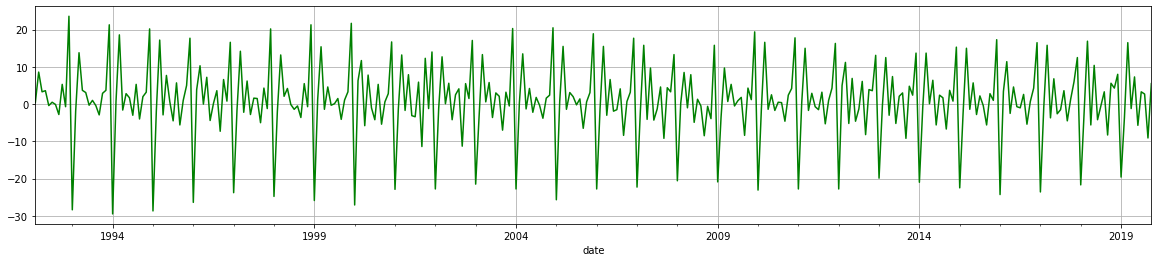

In [15]:
retail["value"].plot(figsize=(20,4), color="green", grid =True)

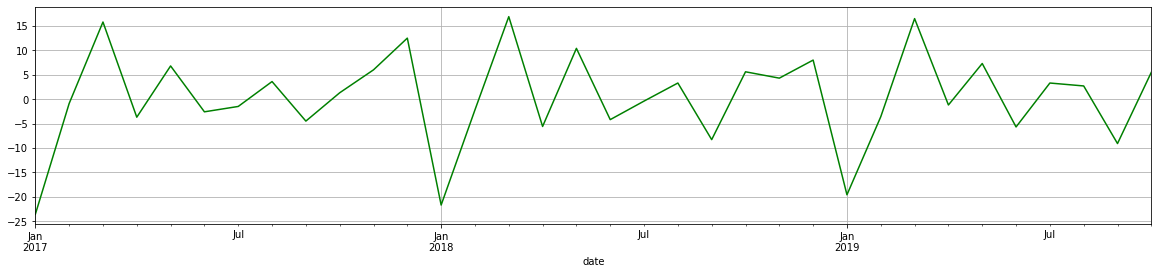

In [23]:
retail.loc["2017-01-01": "2019-10-01"]["value"].plot(figsize=(20,4), color="green", grid =True)

# Checking for seasonality using the adfuller test

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [34]:
adfuller_test(retail["value"])

ADF Test Statistic : -3.692758039080909
p-value : 0.0042161796483201255
#Lags Used : 17
Number of Observations Used : 315
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [35]:
#CHECK FOR SEASONALITY

In [36]:
#p-value : 0.0042161796483201255  dont show seasonality so we dont have to do differencing

# Data Visualization Zooming in

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
Dataviz_df = retail.copy()

In [40]:
Dataviz_df.head(10)

,date,value
date,,
1992-02-01,1992-02-01,0.4
1992-03-01,1992-03-01,8.6
1992-04-01,1992-04-01,3.3
1992-05-01,1992-05-01,3.6
1992-06-01,1992-06-01,-0.4
1992-07-01,1992-07-01,0.5
1992-08-01,1992-08-01,-0.1
1992-09-01,1992-09-01,-2.8
1992-10-01,1992-10-01,5.3


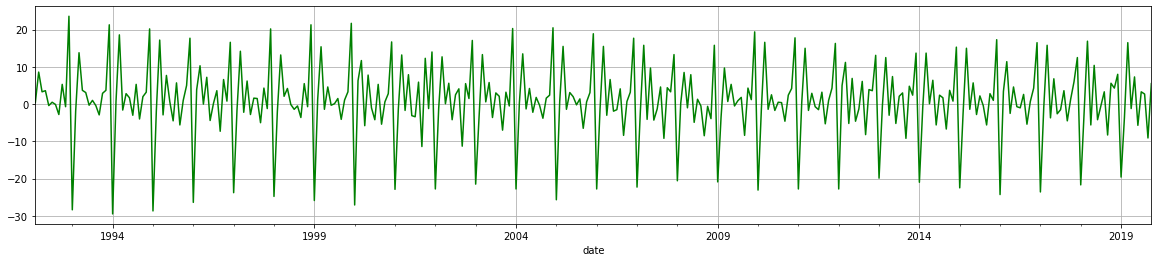

In [43]:
Dataviz_df['value'].plot(figsize=(20,4), color="green", grid =True)

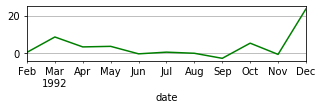

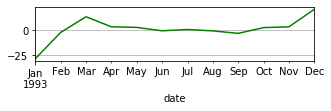

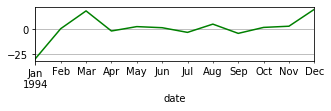

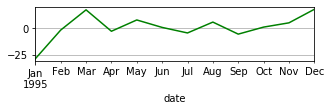

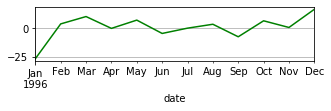

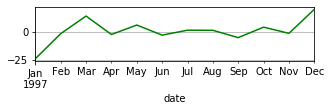

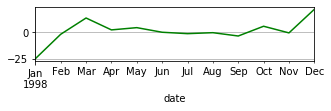

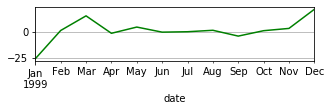

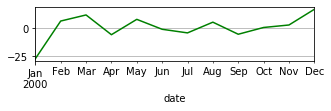

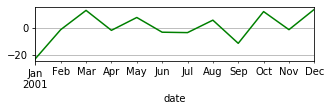

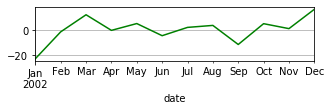

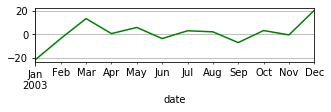

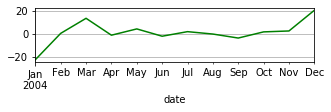

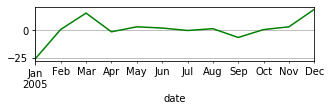

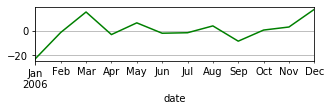

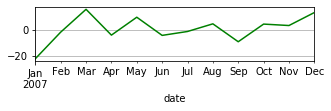

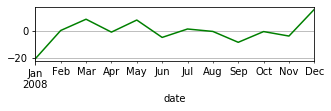

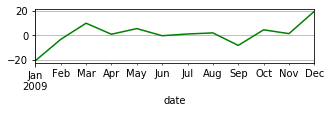

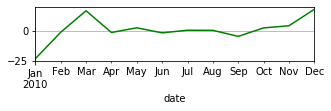

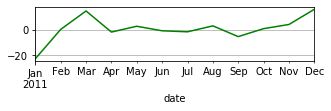

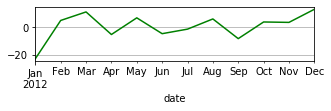

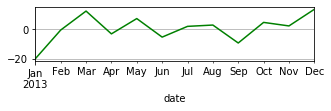

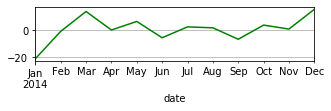

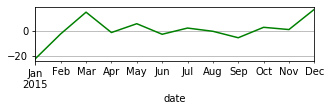

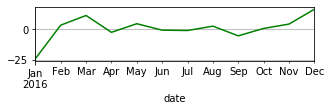

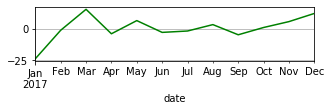

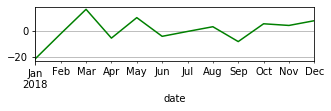

In [48]:
for i in range(1992,2019):
    k=retail["value"][(retail["date"].dt.year==i)]
    k.plot(figsize=(5,1), color="green", grid =True)
    plt.show()

# Trendline

In [78]:
import seaborn as sns

In [80]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 333 entries, 1992-02-01 to 2019-10-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    333 non-null    datetime64[ns]
 1   value   333 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


In [85]:
retail=retail.reset_index()

In [91]:
plt.rcParams['figure.figsize']=(15,4)

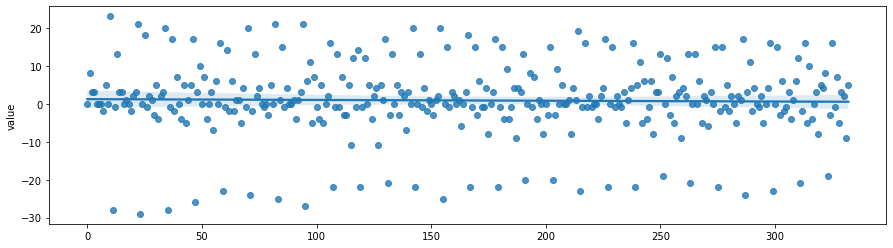

In [92]:
sns.regplot(x= retail.index, y=retail['value'])

# lag plot

In [100]:
plt.rcParams['figure.figsize']=(5,5)

In [105]:
from pandas.plotting import lag_plot
#by default uses lag 1

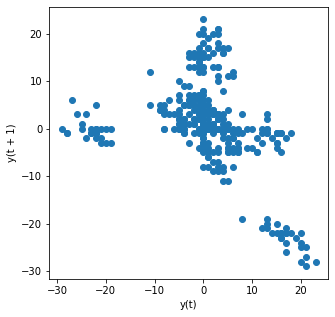

In [102]:
lag_plot(retail['value'])

In [104]:
#dont reflect much corelation for a default of lag 1

# Autocorelation plot

In [111]:
plt.rcParams['figure.figsize']=(17,5)

In [112]:
from pandas.plotting import autocorrelation_plot

In [115]:
# Aucorelation plot automatically calculates for all lag values the corelation values
#Lag values on X axis and it calucultes the cooresponding coorelation values in the Y
# for AARIMA nsd SARIMAX models this is important to know

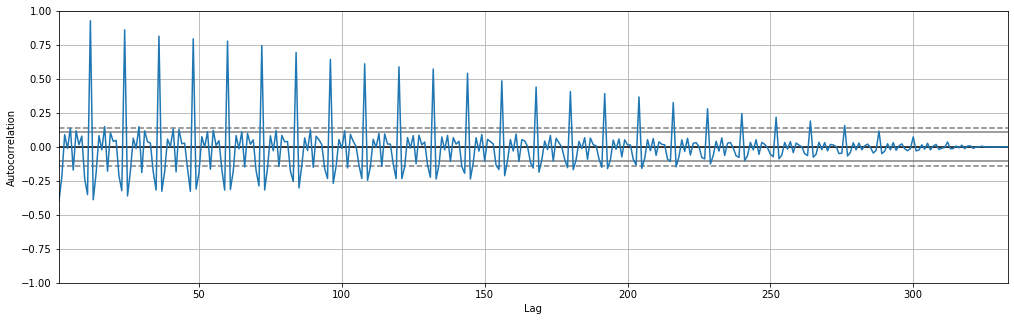

In [119]:
autocorrelation_plot(retail['value'])

In [277]:
#hightest value is low in first and then flat .50 is the confidence interval line

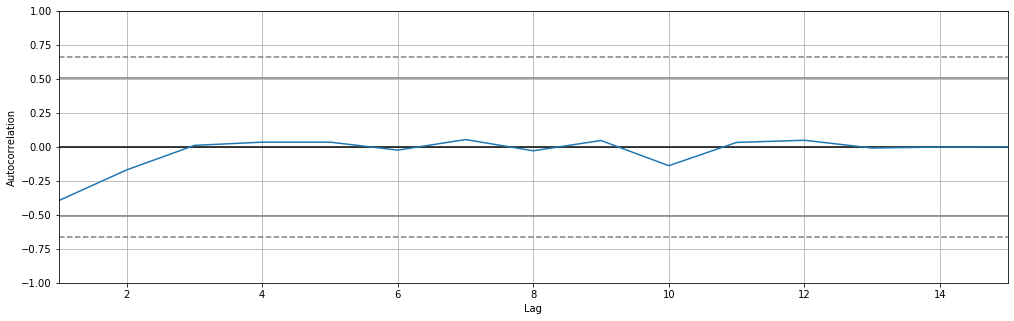

In [122]:
autocorrelation_plot(retail['value'][0:15])

# Decomposition of Series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [136]:
retail

,date,value
date,,
1992-02-01,1992-02-01,0.4
1992-03-01,1992-03-01,8.6
1992-04-01,1992-04-01,3.3
1992-05-01,1992-05-01,3.6
1992-06-01,1992-06-01,-0.4
...,...,...
2019-06-01,2019-06-01,-5.7
2019-07-01,2019-07-01,3.3
2019-08-01,2019-08-01,2.7


In [139]:
#MAKE SURE THE DF INDEX IS DATETIME SERIES

In [166]:
plt.rcParams['figure.figsize']=(7,4)

In [149]:
result_add = seasonal_decompose(retail['value'], model='additive')

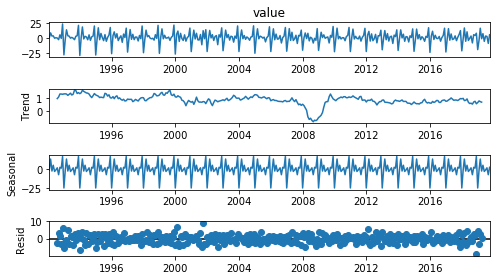

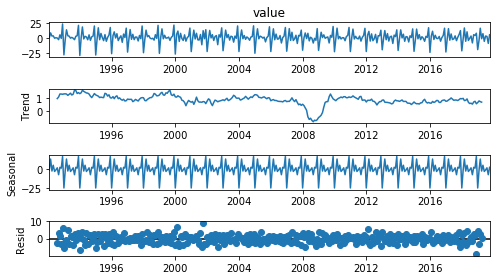

In [168]:
result_add.plot()

In [165]:
#MULT METHOD WONT WORK FOR ZERO AND NEGATIVE VALUES SO WE +1 and POW 2

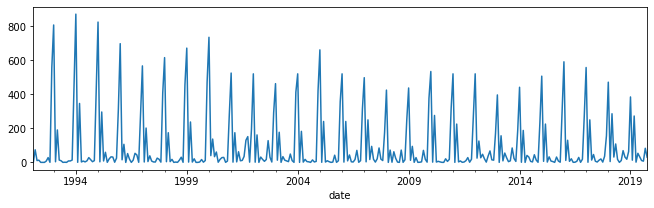

In [160]:
retail['value'].pow(2).plot()

In [169]:
#has negative value

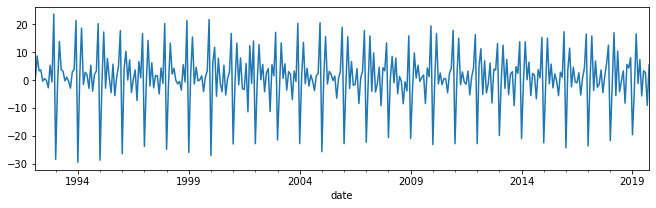

In [161]:
retail['value'].pow(1).plot()

In [171]:
# +1 to remove zeros

In [162]:
result_mult = seasonal_decompose((retail['value'].pow(2)+1), model='multiplicative')


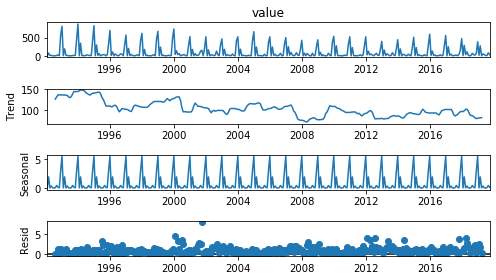

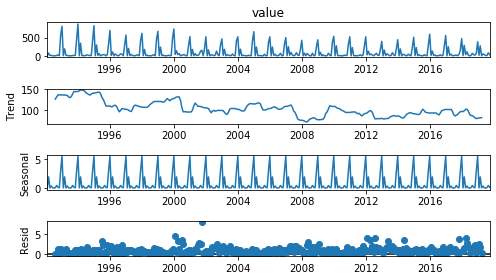

In [167]:
result_mult.plot()

# Differencing

In [172]:
# the series dont show much seasonality but lets check it for yearly seasonality that we do see at end of the year

In [173]:
# diff with a lag m = the seasonality , yearly M = 12 , weekly m = 7

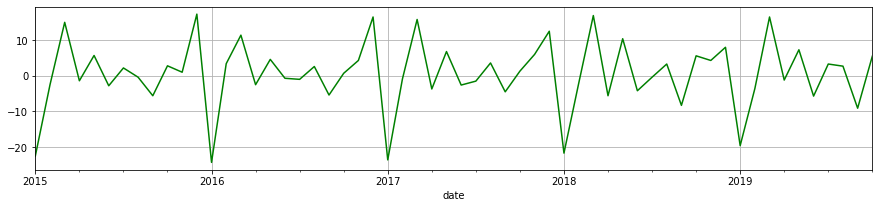

In [190]:
retail["2015-01-01": "2019-10-01"]["value"].plot(figsize=(15,3), grid=True , color="green")

In [191]:
retail["diff_12"]=retail["value"].diff(periods=12)

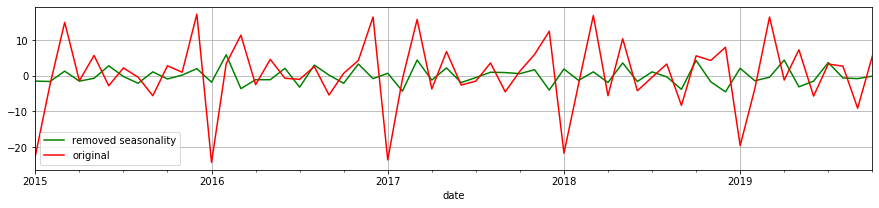

In [194]:
retail["2015-01-01": "2019-10-01"]["diff_12"].plot(figsize=(15,3), grid=True , color="green" , label ="removed seasonality")
retail["2015-01-01": "2019-10-01"]["value"].plot(figsize=(15,3), grid=True , color="red" , label="original")
plt.legend()

In [195]:
#SOME EQUATIONS AND EXPLAINATION

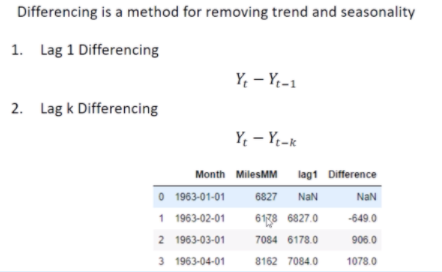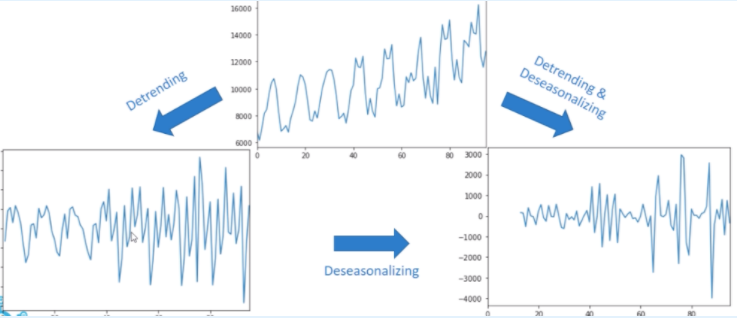

# Train Test Split in Time Series

In [196]:
retail.shape

(333, 3)

In [209]:
retail= retail.drop(columns=["date","diff_12"])

In [243]:
retail.tail

<bound method NDFrame.tail of             value
date             
1992-02-01    0.4
1992-03-01    8.6
1992-04-01    3.3
1992-05-01    3.6
1992-06-01   -0.4
...           ...
2019-06-01   -5.7
2019-07-01    3.3
2019-08-01    2.7
2019-09-01   -9.1
2019-10-01    5.5

[333 rows x 1 columns]>

In [210]:
#if you want to keep 20% as test

In [211]:
round(retail.shape[0]/20)

17

In [212]:
n=round(retail.shape[0]/20)

In [213]:
train, test = retail[1:retail.shape[0]-n], retail[retail.shape[0]-n:]

In [214]:
train.shape

(315, 1)

In [215]:
test.shape

(17, 1)

In [244]:
333-17

316

In [217]:
train.head(5)

,value
date,
1992-03-01,8.6
1992-04-01,3.3
1992-05-01,3.6
1992-06-01,-0.4
1992-07-01,0.5


## Simple AR AutoRegression Model

In [218]:
from statsmodels.tsa.ar_model import AR

In [219]:
model_ar=AR(train)

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWar

In [365]:
model_fit = model_ar.fit()

In [366]:
from sklearn.metrics import mean_squared_error


In [367]:
start=len(train)
start

315

In [368]:
end=len(train)+len(test)-1
end

331

In [369]:
predictions = model_fit.predict(start=315, end=331)

In [257]:
len(predictions)

17

In [258]:
len(test)

17

In [259]:
test

,value
date,
2018-06-01,-4.2
2018-07-01,-0.4
2018-08-01,3.3
2018-09-01,-8.3
2018-10-01,5.6
2018-11-01,4.3
2018-12-01,8.0
2019-01-01,-19.6
2019-02-01,-3.6


In [260]:
predictions

2018-06-01    -4.544396
2018-07-01    -1.928763
2018-08-01     4.913509
2018-09-01    -5.482777
2018-10-01     1.568161
2018-11-01     6.868842
2018-12-01    11.437059
2019-01-01   -20.639818
2019-02-01    -1.553771
2019-03-01    15.593732
2019-04-01    -5.385685
2019-05-01    10.171881
2019-06-01    -5.367806
2019-07-01    -1.726187
2019-08-01     5.252762
2019-09-01    -5.935444
2019-10-01     1.859683
Freq: MS, dtype: float64

In [261]:
mse=(mean_squared_error(test, predictions))

In [262]:
mse

7.922177336327849

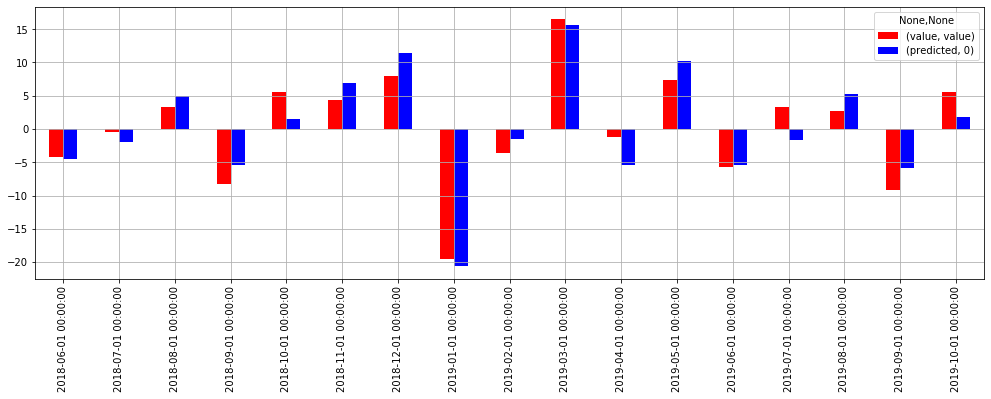

In [270]:
pd.concat([test,predictions], axis=1, keys=["value","predicted"] ).plot(kind="bar", figsize=(17,5), grid=True, color=["red", "blue"])

# TimeSeries ARIMA

In [287]:
#Auto Regression Integreted Moving Average

In [288]:
#PDQ

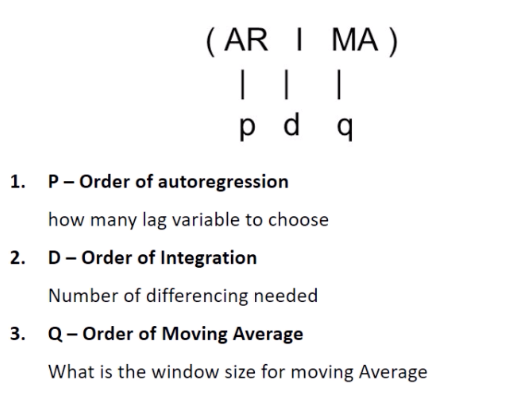

# Finding P Q D  values for ARIMA

In [291]:
#DIFFERENCING = D

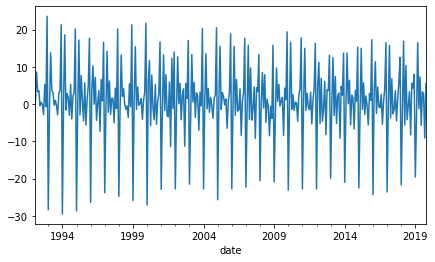

In [292]:
retail["value"].plot()  #linera trend D=1 , for quadratic trend D=2
#here its linear d=1

# Partial Autocorrelation Graph

In [293]:
#finding Q from partial AutoCorelation

#Q = ORDER OF MOVING AVERAGES

In [283]:
from statsmodels.graphics.tsaplots import plot_pacf

In [284]:
# q = 1  .. the blue block is the confidence interval and 
# at 1 the autorelation line if u connect the blue dots crossed the confidence interval

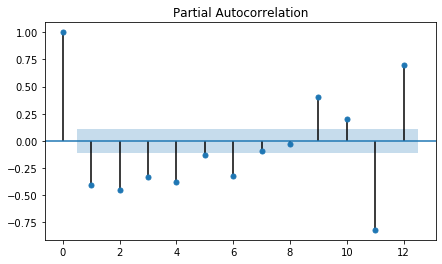

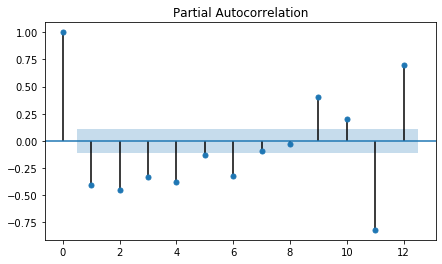

In [297]:
plot_pacf(retail['value'], lags=12)

# Auto corelation plot to find p

In [290]:
#p=0  #NO OF LAG VALUES

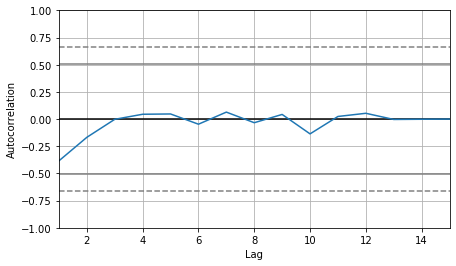

In [286]:
autocorrelation_plot(retail['value'][0:15])

# #ARIMA model

In [298]:
from statsmodels.tsa.arima_model import ARIMA

In [304]:
#order=p d q  p=0,d=1,q=1 

In [370]:
model = ARIMA(retail["value"], order =(1,1,1))

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferr

In [371]:
model_fit = model.fit()

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [372]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                  332
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1209.351
Method:                       css-mle   S.D. of innovations              9.150
Date:                Sun, 13 Dec 2020   AIC                           2426.702
Time:                        00:11:25   BIC                           2441.923
Sample:                    03-01-1992   HQIC                          2432.772
                         - 10-01-2019                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0023      0.004     -0.613      0.540      -0.010       0.005
ar.L1.D.value    -0.3978      0.050     -7.920      0.000      -0.496      -0.299
ma.L1.D.value    -0.9999      0.008   -133.200      0.000      -1.015      -0.985
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.5136           +0.0000j            2.5136            0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

# Checking residuals

In [373]:
#residual patterns should be looking like white nosise

In [374]:
# if Residual have any pattern we can improve the model

In [375]:
model_fit.resid

date
1992-03-01    8.202295
1992-04-01    0.435049
1992-05-01   -1.549279
1992-06-01   -4.975137
1992-07-01   -4.540437
                ...   
2019-06-01   -3.558777
2019-07-01    0.283329
2019-08-01    3.266250
2019-09-01   -8.779135
2019-10-01    1.156039
Length: 332, dtype: float64

In [376]:
residuals=model_fit.resid

In [321]:
residuals[250:333]

date
2013-01-01   -20.630491
2013-02-01    -1.046418
2013-03-01    11.859923
2013-04-01    -3.684564
2013-05-01     6.732090
                ...    
2019-06-01    -6.264962
2019-07-01     2.756286
2019-08-01     2.150139
2019-09-01    -9.654151
2019-10-01     4.977133
Length: 82, dtype: float64

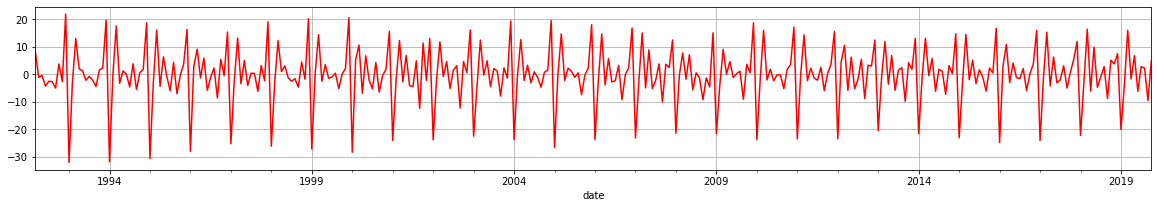

In [358]:
residuals.plot(figsize=(20,3), color="red" , grid=True)

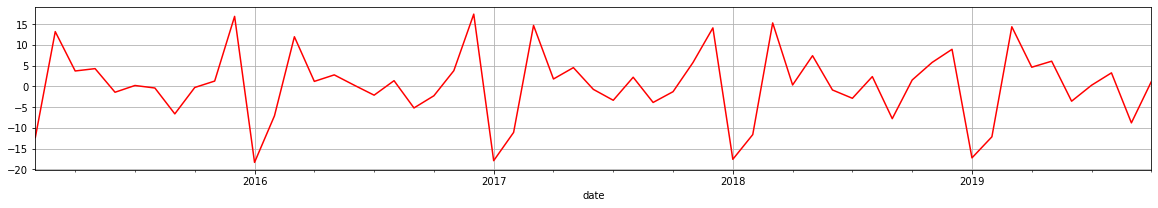

In [377]:
residuals[275:333].plot(figsize=(20,3), color="red",grid=True)

In [378]:
residuals.describe()

count    332.000000
mean      -0.140021
std        9.239424
min      -24.149413
25%       -5.012446
50%        0.079111
75%        3.872535
max       21.441583
dtype: float64

In [333]:
#other variations or Arima

### Variations
* **ARIMA** - <br />
    model = ARIMA(df['Sales'], order=(q,d,p)) <br />
* **Autoregression** - <br />
    model = ARIMA(df['Sales'], order=(p,d,0)) <br />
* **Moving Avaerage Model** - <br />
    model = ARIMA(df['Sales'], order=(0,d,q)) <br />

# FORECAST using Arima

In [350]:
output = model_fit.forecast()

In [351]:
#Forcast will give 3 values 0 = the forcasted value , 1 = std deviation , 2 = 90% confidence interval

In [352]:
output

(array([-1.46763023]),
 array([9.14965797]),
 array([[-19.40063033,  16.46536986]]))

In [353]:
output[0]  #for next period

array([-1.46763023])

In [379]:
output_24 = model_fit.forecast(24)[0]

In [380]:
output_24

array([-1.46763023,  1.30117509,  0.1964217 ,  0.63273096,  0.45594145,
        0.52306811,  0.49315477,  0.50184798,  0.49518191,  0.49462639,
        0.49163984,  0.48962046,  0.4872163 ,  0.48496522,  0.48265323,
        0.48036548,  0.47806808,  0.47577453,  0.47347944,  0.47118496,
        0.46889025,  0.46659562,  0.46430096,  0.46200632])

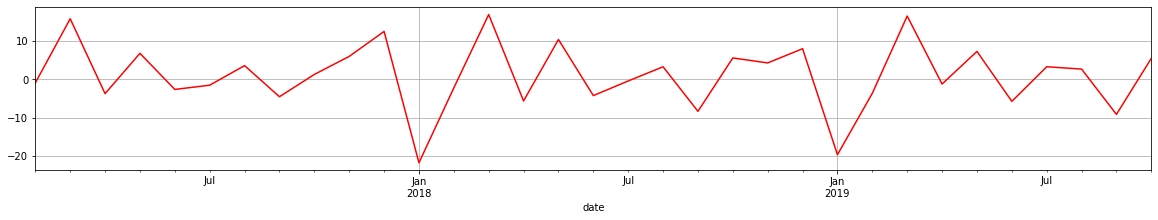

In [381]:
retail["value"][300:333].plot(figsize=(20,3), color="red",grid=True)

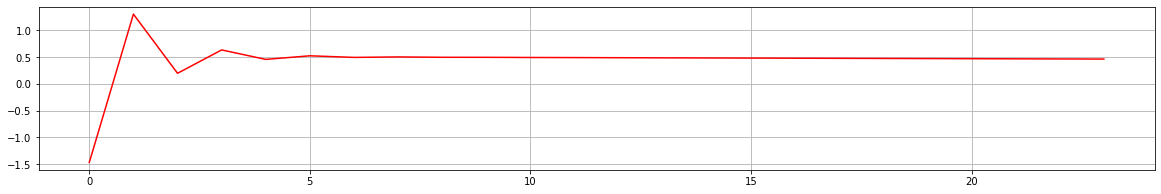

In [382]:
pd.Series(output_24).plot(figsize=(20,3), color="red",grid=True)

In [384]:
# COnclusion ARIMA model wont work well for sesonal data 

# SARIMA

In [385]:
import statsmodels.api as sm

	
SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.    1 sesonality lag , yearly =1
* D: Seasonal difference order.   desonalize diff number
* Q: Seasonal moving average order. 
* m: The number of time steps for a single seasonal period.   if yearly 12 monthly data , m = 7 for weekly 

In [386]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [388]:
retail.head()

,value
date,
1992-02-01,0.4
1992-03-01,8.6
1992-04-01,3.3
1992-05-01,3.6
1992-06-01,-0.4


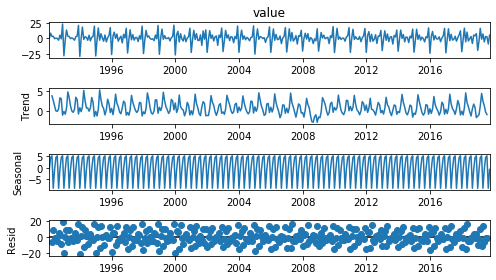

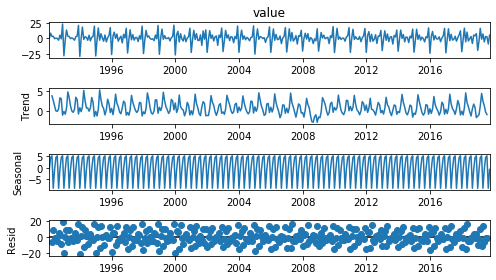

In [390]:
result = seasonal_decompose(retail["value"], model ="additive", period=4)
result.plot()

In [392]:
model_sm = SARIMAX(retail['value'], order=(0,1,1), seasonal_order=(1,1,1,12))

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [393]:
model_sm_fit=model_sm.fit()

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [394]:
residuals_sm=model_sm_fit.resid

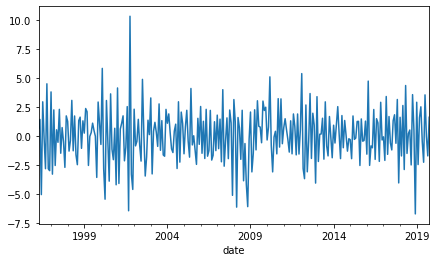

In [396]:
residuals_sm[50:].plot()

In [397]:
#this looks like white noise and is GOOD compared to ARIMA resid

In [398]:
# Good indicater its centered to 0

# Forecast Sarima

In [404]:
output_sm = model_sm_fit.forecast()
output_sm

2019-11-01    3.28648
Freq: MS, dtype: float64

In [419]:
output_sm[0]

3.2864798942636226

In [402]:
retail["value"].tail(5)

date
2019-06-01   -5.7
2019-07-01    3.3
2019-08-01    2.7
2019-09-01   -9.1
2019-10-01    5.5
Name: value, dtype: float64

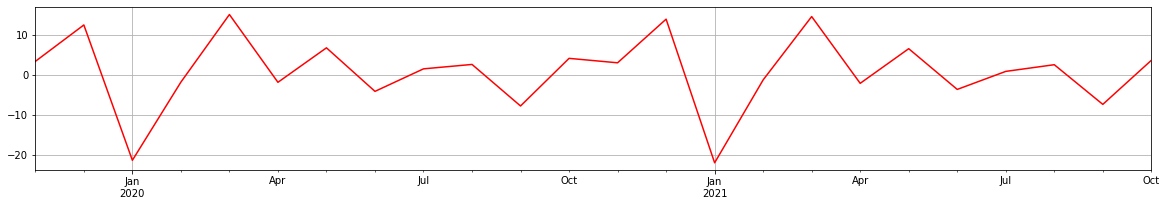

In [420]:
model_sm_fit.forecast(24).plot(figsize=(20,3), color="red",grid=True)


In [446]:
forecast_sm=model_sm_fit.forecast(24)

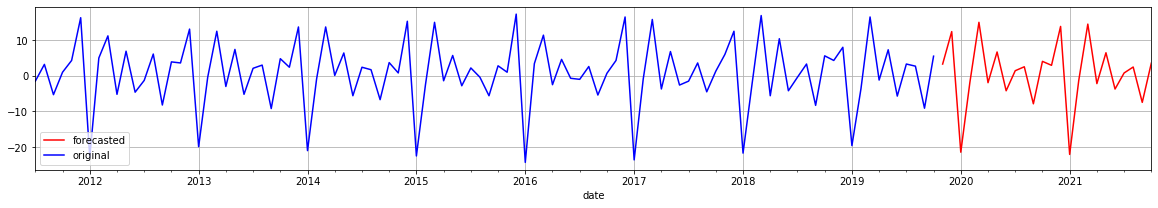

In [452]:
forecast_sm.plot(figsize=(20,3), color="red",grid=True , label="forecasted")
retail["value"].tail(100).plot(figsize=(20,3), color="blue",grid=True, label="original")
plt.legend()

# check prediction

In [448]:
yhat=model_sm_fit.predict() # if no end start given it takes all

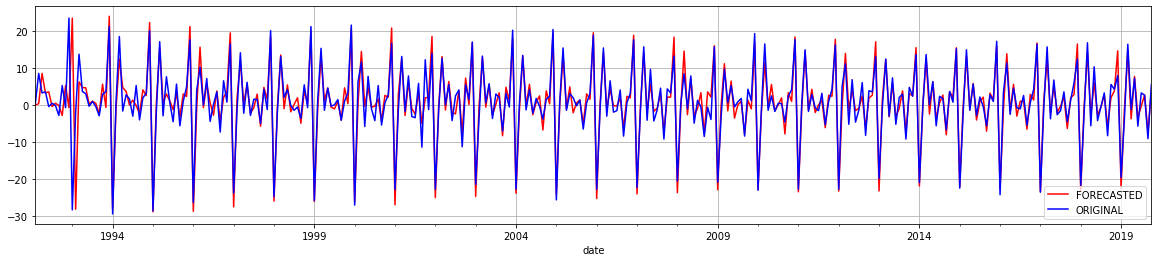

In [453]:
yhat.plot(figsize=(20,4), color="red",grid=True, label="FORECASTED" )
retail["value"].plot(figsize=(20,4), color="blue",grid=True, label="ORIGINAL")
plt.legend()

In [456]:
#MEAN SQ ERROR

In [454]:
mse=(mean_squared_error(retail["value"], yhat))

In [457]:
mse

18.581107514447456

# WalkForward

In [ ]:
train, test = retail.value[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]